In [62]:
import matplotlib.pyplot as plt
import numpy as np

from src.algorithms.qlearning import QLearning
from src.experiments.experiment import setup_experiment
from src.experiments.reward.run_experiment import run_experiment_in_simulator
from src.snake.reward import NegTravelPosScore, NegDistanceNegBorderCollisionPosBodySize, NegDistanceNegDeathPosBodySize
from src.snake.state import DirectionalScoreState, DirectionalState, BoardScoreState
from src.util.math import compute_mean_over_time
from src.snake.agent import SnakeAgent, SnakeRandomAgent
from src.core.policy import GreedyPolicy
from src.snake.parameters import SnakeParameters
from src.main import main

# Test 1


In [83]:
seed = 123

experiment = setup_experiment(QLearning, "test", seed)
experiment.train_episodes = 100000
experiment.state = DirectionalScoreState
experiment.reward = NegTravelPosScore

experiment.load()
experiment.train()
experiment.save()

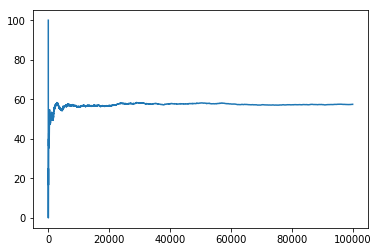

In [64]:
game_score_per_episode = experiment.env.game_score_coef * experiment.model_.food_count_per_episode[::10]
x = np.arange(1, len(game_score_per_episode) * 10 + 1, 10)

plt.plot(x, compute_mean_over_time(game_score_per_episode))
plt.show()

In [65]:
for train_episodes in (1000, 10000, 100000):
    experiment.train_episodes = train_episodes
    experiment.load()
    experiment.train()
    experiment.save()
    
    np.random.seed(123)
    print("Test performance after %i iterations:" % (train_episodes,))
    agent = SnakeAgent(GreedyPolicy(experiment.env),
                   experiment.model_.Q)
    scores = experiment.env.run(agent, 10000)
    print("Avg Score: %0.03f (Std: %0.03f)" % (np.mean(scores), np.std(scores)))

np.random.seed(123)
agent = SnakeRandomAgent(experiment.env)
print("Random Agent performance:")
scores = experiment.env.run(agent, 10000)
print("Avg Score: %0.03f (Std: %0.03f)" % (np.mean(scores), np.std(scores)))

Test performance after 1000 iterations:
Avg Score: 39.090 (Std: 64.319)
Test performance after 10000 iterations:
Avg Score: 57.880 (Std: 50.358)
Test performance after 100000 iterations:
Avg Score: 60.540 (Std: 53.319)
Random Agent performance:
Avg Score: 20.130 (Std: 46.473)


In [84]:
run_experiment_in_simulator(experiment)

# Test 2

In [90]:
seed = 123

experiment = setup_experiment(QLearning, "test", seed)
experiment.train_episodes = 100000
experiment.state = DirectionalScoreState
experiment.reward = NegDistanceNegBorderCollisionPosBodySize

experiment.load()
experiment.train()
experiment.save()

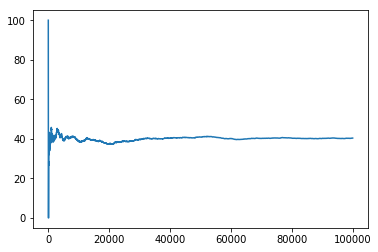

In [68]:
game_score_per_episode = experiment.env.game_score_coef * experiment.model_.food_count_per_episode[::10]
x = np.arange(1, len(game_score_per_episode) * 10 + 1, 10)

plt.plot(x, compute_mean_over_time(game_score_per_episode))
plt.show()

In [69]:
for train_episodes in (1000, 10000, 100000):
    experiment.train_episodes = train_episodes
    experiment.load()
    experiment.train()
    experiment.save()
    
    np.random.seed(123)
    print("Test performance after %i iterations:" % (train_episodes,))
    agent = SnakeAgent(GreedyPolicy(experiment.env),
                   experiment.model_.Q)
    scores = experiment.env.run(agent, 10000)
    print("Avg Score: %0.03f (Std: %0.03f)" % (np.mean(scores), np.std(scores)))

Test performance after 1000 iterations:
Avg Score: 44.230 (Std: 81.048)
Test performance after 10000 iterations:
Avg Score: 6.930 (Std: 26.362)
Test performance after 100000 iterations:
Avg Score: 39.920 (Std: 72.790)


In [ ]:
run_experiment_in_simulator(experiment)

# Test 3

In [71]:
seed = 123

experiment = setup_experiment(QLearning, "test", seed)
experiment.train_episodes = 1000000
experiment.state = DirectionalScoreState
experiment.reward = NegDistanceNegBorderCollisionPosBodySize

experiment.load()
experiment.train()
experiment.save()

np.random.seed(123)
print("Test performance after %i iterations:" % (experiment.train_episodes,))
agent = SnakeAgent(GreedyPolicy(experiment.env),
                   experiment.model_.Q)
scores = experiment.env.run(agent, 10000)
print("Avg Score: %0.03f (Std: %0.03f)" % (np.mean(scores), np.std(scores)))

Test performance after 1000000 iterations:
Avg Score: 18.660 (Std: 74.965)


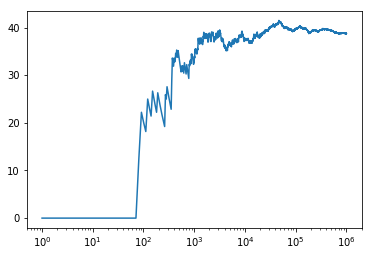

In [72]:
game_score_per_episode = experiment.env.game_score_coef * experiment.model_.food_count_per_episode[::10]
x = np.arange(1, len(game_score_per_episode) * 10 + 1, 10)

plt.semilogx(x, compute_mean_over_time(game_score_per_episode))
plt.show()

In [73]:
run_experiment_in_simulator(experiment)

In [74]:
seed = 123

experiment = setup_experiment(QLearning, "test", seed)
experiment.train_episodes = 1000000
experiment.state = DirectionalState
experiment.reward = NegDistanceNegBorderCollisionPosBodySize

experiment.load()
experiment.train()
experiment.save()

np.random.seed(123)
print("Test performance after %i iterations:" % (1000000,))
agent = SnakeAgent(GreedyPolicy(experiment.env),
                   experiment.model_.Q)
scores = experiment.env.run(agent, 10000)
print("Avg Score: %0.03f (Std: %0.03f)" % (np.mean(scores), np.std(scores)))

Test performance after 1000000 iterations:
Avg Score: 38.440 (Std: 56.110)


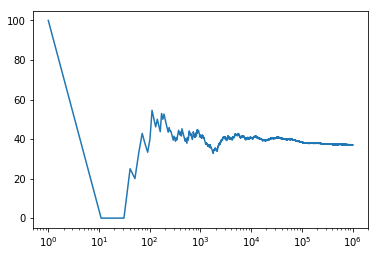

In [75]:
game_score_per_episode = experiment.env.game_score_coef * experiment.model_.food_count_per_episode[::10]
x = np.arange(1, len(game_score_per_episode) * 10 + 1, 10)

plt.semilogx(x, compute_mean_over_time(game_score_per_episode))
plt.show()

In [85]:
seed = 123

experiment = setup_experiment(QLearning, "test", seed)
experiment.train_episodes = 1000000
experiment.state = BoardScoreState
experiment.reward = NegDistanceNegBorderCollisionPosBodySize

experiment.load()
experiment.train()
experiment.save()

np.random.seed(123)
print("Test performance after %i iterations:" % (experiment.train_episodes,))
agent = SnakeAgent(GreedyPolicy(experiment.env),
                   experiment.model_.Q)
experiment.env.state = BoardScoreState
print("Avg Score: %0.03f (Std: %0.03f)" % (np.mean(scores), np.std(scores)))

Test performance after 1000000 iterations:
Avg Score: 38.440 (Std: 56.110)


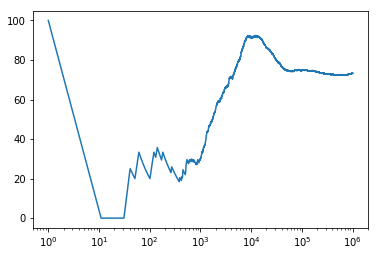

In [77]:
game_score_per_episode = experiment.env.game_score_coef * experiment.model_.food_count_per_episode[::10]
x = np.arange(1, len(game_score_per_episode) * 10 + 1, 10)

plt.semilogx(x, compute_mean_over_time(game_score_per_episode))
plt.show()

In [86]:
run_experiment_in_simulator(experiment)

In [87]:
seed = 123

experiment = setup_experiment(QLearning, "test", seed)
experiment.train_episodes = 1000000
experiment.state = BoardScoreState
experiment.reward = NegDistanceNegDeathPosBodySize

experiment.load()
experiment.train()
experiment.save()

np.random.seed(123)
print("Test performance after %i iterations:" % (experiment.train_episodes,))
agent = SnakeAgent(GreedyPolicy(experiment.env),
                   experiment.model_.Q)
experiment.env.state = BoardScoreState
print("Avg Score: %0.03f (Std: %0.03f)" % (np.mean(scores), np.std(scores)))

Test performance after 1000000 iterations:
Avg Score: 38.440 (Std: 56.110)


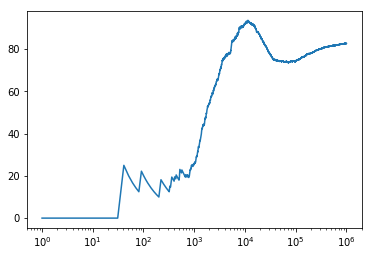

In [80]:
game_score_per_episode = experiment.env.game_score_coef * experiment.model_.food_count_per_episode[::10]
x = np.arange(1, len(game_score_per_episode) * 10 + 1, 10)

plt.semilogx(x, compute_mean_over_time(game_score_per_episode))
plt.show()

In [89]:
run_experiment_in_simulator(experiment)

# Player

In [82]:
# main()